In [131]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
data = pd.read_csv('../input/pokemon.csv')

In [132]:
data.head(6)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False


In [133]:
data.tail(6)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
794,795,Zygarde Half Forme,Dragon,Ground,108,100,121,81,95,95,6,True
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [134]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [135]:
data.shape

(800, 12)

<a id="18"></a> <br>
### EXPLORATORY DATA ANALYSIS
value_counts(): Frequency counts
<br>outliers: the value that is considerably higher or lower from rest of the data
* Lets say value at 75% is Q3 and value at 25% is Q1. 
* Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR
<br>We will use describe() method. Describe method includes:
* count: number of entries
* mean: average of entries
* std: standart deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

<br> What is quantile?

* 1,4,5,6,8,9,11,12,13,14,15,16,17
* The median is the number that is in **middle** of the sequence. In this case it would be 11.

* The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.
* The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [137]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [138]:
#############

In [139]:
print(data['Type 2'].value_counts(dropna=False))

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Ghost        14
Rock         14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64


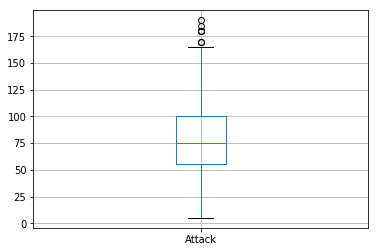

In [140]:
data.boxplot(column='Attack')

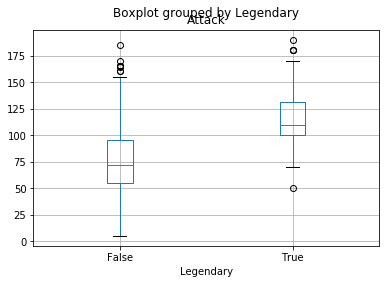

In [141]:
data.boxplot(column='Attack',by = 'Legendary')

In [142]:
data_new=data.head(100).loc[20:25,["Type 1","Type 2","HP","Attack"]]
data_new

,Type 1,Type 2,HP,Attack
20,Normal,Flying,40,45
21,Normal,Flying,63,60
22,Normal,Flying,83,80
23,Normal,Flying,83,80
24,Normal,NaN,30,56
25,Normal,NaN,55,81


In [143]:
melting_data=pd.melt(frame=data_new,id_vars='Type 1',value_vars=['Type 2','HP','Attack'])
melting_data


,Type 1,variable,value
0,Normal,Type 2,Flying
1,Normal,Type 2,Flying
2,Normal,Type 2,Flying
3,Normal,Type 2,Flying
4,Normal,Type 2,NaN
5,Normal,Type 2,NaN
6,Normal,HP,40
7,Normal,HP,63
8,Normal,HP,83
9,Normal,HP,83


In [144]:
data_new = data.head()    # I only take 5 rows into new data
data_new
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


In [145]:
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


In [146]:
data1 = data['Type 1'].head()
data2= data['Type 1'].tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

0      Grass
1      Grass
2      Grass
3      Grass
4       Fire
5       Rock
6       Rock
7    Psychic
8    Psychic
9       Fire
Name: Type 1, dtype: object

In [147]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [148]:
data['Type 1']=data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [149]:
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

In [150]:
data.info() #Type 2 414 not equal to 800

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null category
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null float64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 64.9+ KB


In [151]:
data['Type 2'].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Ghost        14
Rock         14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [152]:
data1=data.copy()

In [153]:
data1["Type 2"].dropna(inplace = True)

In [154]:
assert data1['Type 2'].notnull().all()

In [155]:
data['Type 2'].fillna('empty',inplace=True)

In [157]:
data1.info()
data1['Type 2'].value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null category
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null float64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 61.9+ KB


Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ice         14
Ghost       14
Rock        14
Water       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [158]:
assert  data1['Type 2'].notnull().all()